In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [28]:
X

array([[-6.25834039,  8.46944625],
       [-4.59705473,  7.30216965],
       [-4.87660873, -8.04109671],
       ...,
       [ 4.26240465, -4.95979227],
       [ 2.7508609 , -6.09159459],
       [ 4.38993918, -5.36791186]])

In [29]:
y

array([1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2,
       2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0,

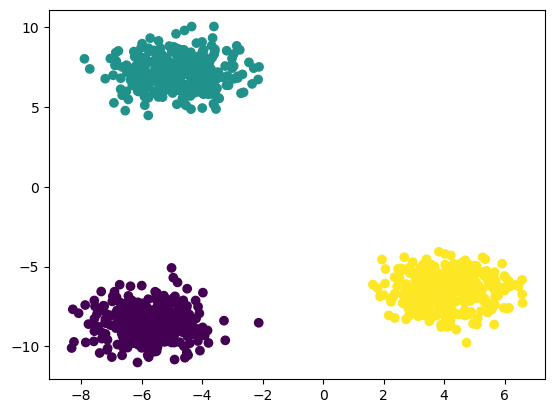

In [30]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [31]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Elbow Method

In [42]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [43]:
wcss

[1400.0000000000011,
 642.7475685179389,
 48.26092102027728,
 40.32869140538324,
 32.82298231618111,
 31.69996651083177,
 23.784017459466504,
 21.330669935550425,
 20.032954137680644,
 18.656028285939012]

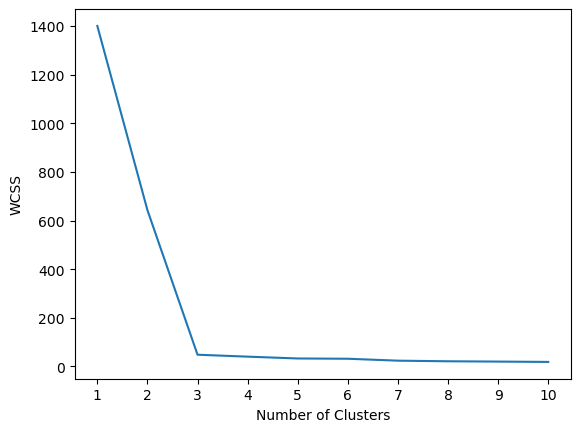

In [44]:
# Plot the elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [46]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1,
       1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1,

In [47]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0], d

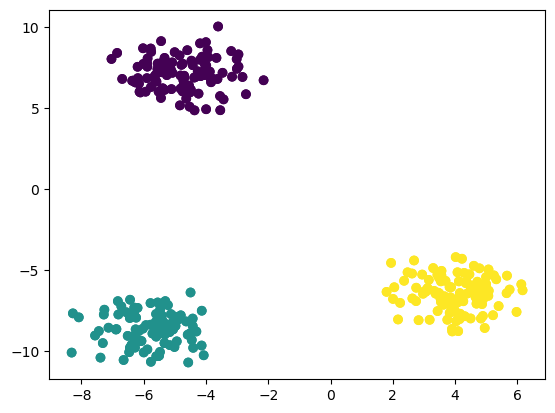

In [49]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()

In [50]:
# Validating the k value
# kneelocator
# Silhoutte scoring

In [51]:
# kneelocator
!pip install kneed

In [52]:
from kneed import KneeLocator

In [55]:
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [57]:
kl.elbow

np.int64(3)

In [59]:
# Silhoutte scoring
from sklearn.metrics import silhouette_score

In [60]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [61]:
silhouette_coefficients

[np.float64(0.616728819639576),
 np.float64(0.8498985822246342),
 np.float64(0.7046534766018002),
 np.float64(0.5528046809818543),
 np.float64(0.3962004438415431),
 np.float64(0.3763708007258492),
 np.float64(0.34749897551767395),
 np.float64(0.30775824156665804),
 np.float64(0.33024628504219844)]

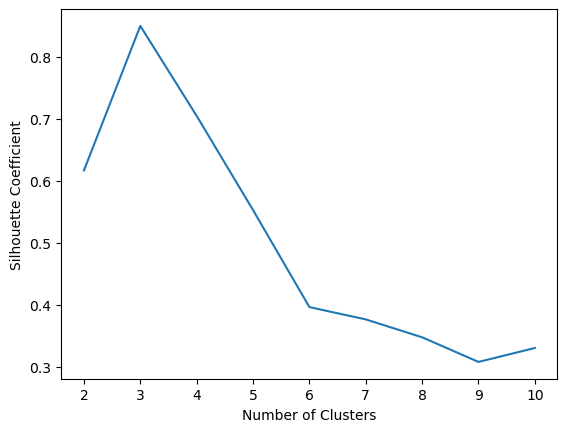

In [62]:
# Plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()